In [377]:
# !pip install numpy
# !pip install matplotlib
# !pip install scikit-learn
# !pip install seaborn

In [378]:
import os 
import pandas as pd
import numpy as np

In [379]:
#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [380]:
plt.rcParams['legend.fontsize'] = 10

In [381]:
# Clustering Algorithms
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score

In [382]:
# reading datasets 
df_train = pd.read_excel("Acviss interview - Training set.xlsx")
df_test = pd.read_excel("Acviss interview - Test set.xlsx")

In [383]:
df_train.head()

,product_MRP,product_ratings,seller_ratings
0,123,3.0,4.30
1,5999,4.4,2.65
2,4343,3.9,4.75
3,4499,3.8,4.75
4,150,4.1,4.65


In [384]:
df_test.head()

,product_MRP,product_ratings,seller_ratings
0,6299,3.6,4.75
1,1199,4.5,4.45
2,6009,4.1,4.50
3,133,1.6,4.30
4,1685,4.2,4.50


In [385]:
# converting dataframe to numpy array
X_train = np.array(df_train.values.tolist())
X_test = np.array(df_test.values.tolist())
print(X_train.shape)
print(X_test.shape)

(116, 3)
(6, 3)


In [386]:
def plot_3D(df):
    x = np.array(df["product_MRP"].values.tolist())
    y = np.array(df["product_ratings"].values.tolist())
    z = np.array(df["seller_ratings"].values.tolist())
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('product_MRP')
    ax.set_ylabel('product_ratings')
    ax.set_zlabel('seller_ratings')
    ax.scatter(x, y, z, label="product",zdir='z', c= 'blue')

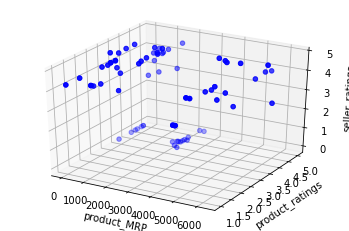

In [387]:
plot_3D(df_train)

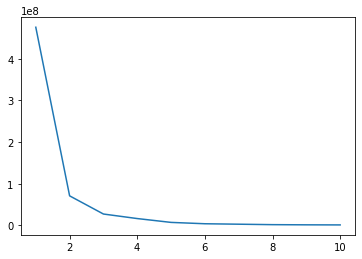

In [388]:
# function returns WSS score for k values from 1 to kmax
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
# calculate square of Euclidean distance of each point from its cluster center and add to current WSS

   for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse

k_val_wss = [i for i in range(1,11,1)]
sse = calculate_WSS(X_train, 10)
plt.plot(k_val_wss,sse, label="graph")

[0.7639124858330166, 0.7453039103240191, 0.703735486847169, 0.7699183457369226, 0.7787347412983013, 0.7632671415548608, 0.7753971013851766, 0.7734409288752869, 0.7460897166620911]


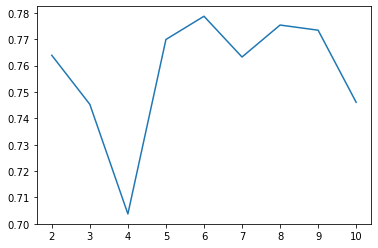

In [389]:
sil = []
kmax = 10
k_val = [i for i in range(2,11,1)]

# dissimilarity would not be defined for a single cluster and minimum number of clusters should be 2 . 
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(X_train)
  labels = kmeans.labels_
  sil.append(silhouette_score(X_train, labels, metric = 'euclidean'))

plt.plot(k_val,sil, label="graph")
print(sil)

In [390]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(X_train)

In [391]:
kmeans.labels_

array([2, 4, 5, 1, 2, 2, 0, 2, 2, 3, 2, 2, 0, 3, 1, 2, 3, 2, 0, 1, 0, 0,
       0, 2, 0, 4, 1, 2, 2, 4, 1, 2, 0, 3, 1, 3, 2, 5, 2, 3, 0, 0, 0, 2,
       1, 0, 3, 2, 5, 2, 0, 0, 1, 2, 1, 4, 2, 0, 2, 2, 1, 1, 3, 2, 2, 3,
       2, 0, 2, 2, 1, 3, 2, 1, 2, 2, 3, 0, 3, 1, 4, 2, 2, 0, 2, 0, 1, 5,
       1, 0, 4, 2, 5, 3, 1, 0, 1, 0, 1, 0, 5, 2, 1, 2, 2, 1, 1, 0, 0, 1,
       5, 1, 5, 0, 0, 0])

In [392]:
ans_train = kmeans.labels_

In [393]:
kmeans.predict(X_test)

array([4, 0, 4, 2, 0, 3])

In [394]:
ans_test = kmeans.predict(X_test)

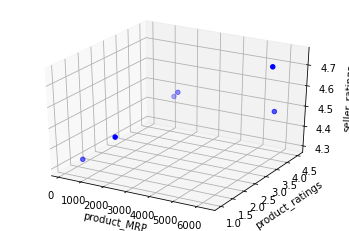

In [395]:
plot_3D(df_test)

In [396]:
df_final_test = pd.DataFrame(columns=['product_MRP','product_ratings','seller_ratings','cluster_number'])

for i in range(0,len(X_test),1):
    ans = str(ans_test[i])
    df_final_test = df_final_test.append({'product_MRP':df_test["product_MRP"][i],'product_ratings':df_test["product_ratings"][i],'seller_ratings':df_test["seller_ratings"][i],'cluster_number':ans,} ,ignore_index=True)

In [397]:
if(os.path.isfile('Test_RESULT.csv')):
    os.remove("Test_RESULT.csv")
    df_final_test.to_csv("Test_RESULT.csv")

In [398]:
df_final_train = pd.DataFrame(columns=['product_MRP','product_ratings','seller_ratings','cluster_number'])

for i in range(0,len(X_train),1):
    ans = str(ans_train[i])
    df_final_train = df_final_train.append({'product_MRP':df_train["product_MRP"][i],'product_ratings':df_train["product_ratings"][i],'seller_ratings':df_train["seller_ratings"][i],'cluster_number':ans,} ,ignore_index=True)

In [399]:
if(os.path.isfile('Train_RESULT.csv')):
    os.remove("Train_RESULT.csv")
    df_final_train.to_csv("Train_RESULT.csv")

In [400]:
df_final_train.head()

,product_MRP,product_ratings,seller_ratings,cluster_number
0,123,3.0,4.30,2
1,5999,4.4,2.65,4
2,4343,3.9,4.75,5
3,4499,3.8,4.75,1
4,150,4.1,4.65,2


In [401]:
df_final_test.head()

,product_MRP,product_ratings,seller_ratings,cluster_number
0,6299,3.6,4.75,4
1,1199,4.5,4.45,0
2,6009,4.1,4.50,4
3,133,1.6,4.30,2
4,1685,4.2,4.50,0
